# Atlanta Average Rent Prices by Neighbourhoods

In [ ]:
!conda install -c conda-forge beautifulsoup4 --yes

!conda install -c conda-forge geopy --yes

!conda install -c conda-forge folium=0.5.0 --yes

print('Libraries installed!')



In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
import json

from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim

import folium
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.preprocessing import StandardScaler, normalize, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

print('Libraries imported!')

Libraries imported!


### Data preparation

Average rent by neighbourhood, URL: https://www.rentcafe.com/average-rent-market-trends/us/ga/atlanta/

In [4]:
# Using Beautiful Soup to parse website's HTML
data = requests.get('https://www.rentcafe.com/average-rent-market-trends/us/ga/atlanta/').text
soup = BeautifulSoup(data,'html.parser')

In [5]:
# Scraping the website tables for average prices
neighborhoodList = []
priceList = []

'''
for area in soup.find_all("div", class_= "title_quote_nl_last"):
    areaText = area.find("a").text
    areaList.append(areaText)


for index, table in enumerate(soup.find_all("table", class_="MarketTrendsAverageRentTable")):
    for row in table.find_all("tr", class_="current-row"):
        cells = row.find_all("td")
        if len(cells)>0:
            neighbourhoodName = cells[0].find("a").text.strip()
            avgPrice = cells[1]
            

for row in soup.find_all("tr", class_ ="current-row"):
    for index in tr.find_all("td"):
        avgPrice = index.find("td").text
        priceList = []
        
for index, table in enumerate(soup.find_all("table", class="MarketTrendsAverageRentTable")):
    for row in table.find_all("tr"):
        cells = row.find_all("td")
        if len(cells)>0:
            neighbourhoodName = cells[0].find("a").text.strip()
            avgPrice = cells[3]
'''

soup = BeautifulSoup(data,'lxml')
print(soup.prettify())



<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="always" name="referrer"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="The average apartment rent in Atlanta is $1,379. Browse detailed statistics &amp; rent trends, compare apartment sizes and rent prices by neighborhood." name="description"/>
  <title>
   Average Rent in Atlanta &amp; Rent Prices by Neighborhood - RENTCafé
  </title>
  <script>
   (function(){if(window.BOOMR && window.BOOMR.version){return;}var dom,doc,where,iframe = document.createElement("iframe"),win = window;function boomerangSaveLoadTime(e){ win.BOOMR_onload=(e && e.timeStamp) || new Date().getTime(); }if (win.addEventListener){ win.addEventListener("load", boomerangSaveLoadTime, false); }else if (win.attachEvent){ win.attachEvent("onload", boomerangSaveLoadTime); }iframe.src 

In [6]:
my_table = soup.find('table',{'class':'market-trends','id':'MarketTrendsAverageRentTable'})
my_table
neighborhoodName = my_table.findAll('th')

for area in neighborhoodName:
    neighborhoodList.append(area.text.strip())

In [8]:
#del neighborhoodList[0:3]
neighborhoodList

['West Manor',
 'Sunridge Construction',
 'Southwest Atlanta',
 'Regency Point',
 'Pomona Park',
 'Peyton Forest',
 'Magnum Manor',
 'Lynn Valley',
 'Legacy at King Walk',
 'Laurens Valley',
 'Ivan Hill',
 'Horseshoe Community',
 'Harland Terrace',
 'Green Forest Acres',
 'Green Acres Valley',
 'Fort Valley',
 'East Ardley Road',
 'Chalet Woods',
 'Cascade Road',
 'Cascade Heights',
 'Cascade Glen',
 'Campbellton Road',
 'Bonnybrook Estates',
 'Audobon Forest West',
 'Audobon Forest',
 'Adams Park',
 'Venetian Hills',
 'Florida Heights',
 'Beecher Hills',
 'Hartsfield Jackson Atlanta Airport',
 'Silverwood Estates',
 'Woodward Hills',
 'Woodward Estates',
 'Woodland Estates',
 'Williams Bluff',
 'Will Lee Pines',
 'Wexford',
 'Waverly Park',
 'Waterford Edge',
 'Walden Park',
 'Vermont Estates',
 'Union Crossing',
 'Traxton Point',
 'Three Lakes',
 'Terrell Estates',
 'Tacoma Forest',
 'Swan Creek',
 'Sun Rise',
 'Stonewyck',
 'Stonewall Manor',
 'Southern Pines',
 'Southern Colony',
 

In [9]:
avgPrice = my_table.findAll('td')
for price in avgPrice:
    priceList.append(price.text.strip())

In [10]:
areaList = pd.DataFrame(
    {'Neighborhood': neighborhoodList,
     'Average Price': priceList
    })


In [11]:
areaList

,Neighborhood,Average Price
0,West Manor,$783
1,Sunridge Construction,$783
2,Southwest Atlanta,$783
3,Regency Point,$783
4,Pomona Park,$783
5,Peyton Forest,$783
6,Magnum Manor,$783
7,Lynn Valley,$783
8,Legacy at King Walk,$783
9,Laurens Valley,$783


In [12]:
areaList['Average Price'] = areaList['Average Price'].map(lambda x:x.lstrip('$'))

In [13]:
areaList['Average Price'] = areaList['Average Price'].replace(',','', regex = True).astype(float)

In [14]:
areaList

,Neighborhood,Average Price
0,West Manor,783.0
1,Sunridge Construction,783.0
2,Southwest Atlanta,783.0
3,Regency Point,783.0
4,Pomona Park,783.0
5,Peyton Forest,783.0
6,Magnum Manor,783.0
7,Lynn Valley,783.0
8,Legacy at King Walk,783.0
9,Laurens Valley,783.0


In [15]:
temp_df1 = pd.concat(g for _, g in areaList.groupby("Neighborhood") if len(g) > 1)
temp_df1

,Neighborhood,Average Price
142,Brookwood,862.0
612,Brookwood,1725.0
197,High Point,932.0
439,High Point,1382.0
77,Park Place South,862.0
190,Park Place South,932.0
479,Riverside,1462.0
535,Riverside,1546.0
367,Woodland Hills,1186.0
506,Woodland Hills,1473.0


In [16]:
areaList = areaList.groupby('Neighborhood', as_index = False).mean()
areaList

,Neighborhood,Average Price
0,Aberdeen Forest,1462.0
1,Adair Park,932.0
2,Adams Park,783.0
3,Adamsville,975.0
4,Almond Park,1546.0
5,Amal Heights,932.0
6,Amberidge,1462.0
7,Amhurst,862.0
8,Anatole,975.0
9,Ansley Park,1918.0


In [17]:
# Load the Geodata file 
!wget -q -O 'atlanta-geodata.csv' https://www.dropbox.com/s/edecety6jpkbtfv/atlanta-postal.csv?dl=0
print('Data fetched!')


Data fetched!


In [18]:
# Load the csv file
with open('atlanta-geodata.csv') as atlGeo:
    atlGeo = pd.read_csv('atlanta-geodata.csv', index_col = 'OBJECTID')

In [19]:
print(atlGeo.loc[12])

ZipCode                30291
FeatureID         LZC0000149
PrefCity          Union City
SHAPESTArea      2.71392e+08
SHAPESTLength         123056
Name: 12, dtype: object


In [20]:
len(areaList)

627

In [21]:
#Data from Zillow Research for national neighborhoods
!wget -q -O 'neighborhood-prices.csv' https://www.dropbox.com/s/qgmhi9cb6k0dfl8/neighborhood-prices.csv?dl=0
print('Data fetched!')

Data fetched!


In [22]:
# Load the csv file
with open('neighborhood-prices.csv') as hoodPrices:
    hoodPrices = pd.read_csv('neighborhood-prices.csv', index_col = 'RegionID')

In [23]:
atlData = hoodPrices[hoodPrices['City'].str.match('Atlanta')]

In [24]:
list(atlData)

['RegionName',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '20

In [25]:
cols = range(6,101)
atlHood = atlData.drop(atlData.columns[cols],axis = 1)

In [26]:
atlHood

,RegionName,City,State,Metro,CountyName,SizeRank,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
RegionID,,,,,,,,,,,,,
269381,Midtown,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,601,13.45,13.38,13.23,13.38,13.44,13.41,13.49
269306,Downtown,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,734,12.23,12.16,11.71,11.88,11.69,11.67,11.71
269397,Old Fourth Ward,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,1006,13.22,13.24,13.00,13.07,13.07,12.96,13.06
269391,North Buckhead,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,1372,14.33,14.46,15.45,15.98,16.07,15.85,15.68
274592,Morningside - Lenox Park,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,1380,16.20,16.31,16.46,16.54,16.70,16.53,16.55
403405,Pine Hills,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,1530,12.61,12.65,12.63,12.77,12.89,12.86,12.86
269345,Home Park,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,1669,14.05,14.22,14.31,14.39,14.61,14.72,14.63
275890,Virginia Highland,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,1733,16.20,16.28,16.46,16.61,16.89,16.72,16.60
129705,Kirkwood,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,1853,16.40,16.39,16.20,16.31,16.26,16.26,16.33


In [27]:
mergeddf = pd.merge(areaList,atlHood,left_on = 'Neighborhood', right_on = 'RegionName')

In [28]:
mergeddf

,Neighborhood,Average Price,RegionName,City,State,Metro,CountyName,SizeRank,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,Ansley Park,1918.0,Ansley Park,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4106,15.37,15.56,16.20,16.37,16.40,16.07,15.79
1,Ardmore,1918.0,Ardmore,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4844,13.42,13.75,15.01,15.44,15.48,15.30,15.23
2,Atlantic Station,2143.0,Atlantic Station,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4182,12.38,12.34,12.59,13.07,13.14,13.47,13.76
3,Bolton,1546.0,Bolton,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4008,12.43,12.56,12.75,12.90,13.07,13.14,13.21
4,Brookwood,1293.5,Brookwood,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4793,12.34,12.48,12.68,12.81,12.80,12.85,12.98
5,Brookwood Hills,1918.0,Brookwood Hills,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4331,15.91,15.80,16.23,16.40,16.39,15.98,15.72
6,Cabbagetown,1403.0,Cabbagetown,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,5051,14.75,14.91,14.82,14.26,14.31,14.38,14.55
7,Candler Park,1691.0,Candler Park,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,3038,16.56,16.54,16.25,16.23,16.00,15.90,16.10
8,Chastain Park,1440.0,Chastain Park,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,3358,16.03,16.09,16.41,16.47,16.45,16.25,16.14
9,East Atlanta,1186.0,East Atlanta,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,2510,15.41,15.39,15.09,15.06,14.94,15.05,15.10


In [29]:
zipcodes = { "Brookwood": "30309",
               "Princeton Lakes":"30344" ,
               "Ormewood Park":"30316" ,
               "East Atlanta" : "30316",
               "Summerhill" : "30315",
               "Kirkwood": "30317",
               "East Lake": "30316",
               "East Chastain Park" : "30342",
               "Cabbagetown" : "30316",
               "Chastain Park" : "30327",
               "Riverside" : "30318",
               "Pine Hills" : "30329",
               "Lindridge - Martin Manor" : "30324",
               "Tuxedo Park" : "30305",
               "Ridgedale Park": "30319",
               "North Buckhead" : "30342",
               "Underwood Hills" : "30318",
               "Hills Park" : "30318",
               "Bolton" : "30318",
               "Morningside - Lenox Park" : "30306",
               "Edgewood" : "30317",
               "Springlake" : "30318",
               "Home Park" : "30318",
               "Paces" : "30327",
               "Margaret Mitchell" : "30327",
               "Old Fourth Ward" : "30308",
               "Lake Claire" : "30307",
               "Inman Park" : "30307",
               "Candler Park" : "30307",
               "Peachtree Park" : "30305",
               "Peachtree Hills" : "30305",
               "Peachtree Heights West" : "30305",
               "Peachtree Heights East" : "30305",
               "Peachtree Battle Alliance" : "30305",
               "Garden Hills" : "30305",
               "Loring Heights" : "30309",
               "Virginia Highland" : "30306",
               "Lenox" : "30324",
               "Brookwood Hills" : "30309",
               "Ardmore" : "30309",
               "Ansley Park" : "30309",
               "Atlantic Station" : "30363",
               }

In [30]:
mergeddf['Zipcode'] = mergeddf['Neighborhood'].map(zipcodes)

In [31]:
mergeddf

,Neighborhood,Average Price,RegionName,City,State,Metro,CountyName,SizeRank,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,Zipcode
0,Ansley Park,1918.0,Ansley Park,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4106,15.37,15.56,16.20,16.37,16.40,16.07,15.79,30309
1,Ardmore,1918.0,Ardmore,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4844,13.42,13.75,15.01,15.44,15.48,15.30,15.23,30309
2,Atlantic Station,2143.0,Atlantic Station,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4182,12.38,12.34,12.59,13.07,13.14,13.47,13.76,30363
3,Bolton,1546.0,Bolton,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4008,12.43,12.56,12.75,12.90,13.07,13.14,13.21,30318
4,Brookwood,1293.5,Brookwood,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4793,12.34,12.48,12.68,12.81,12.80,12.85,12.98,30309
5,Brookwood Hills,1918.0,Brookwood Hills,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4331,15.91,15.80,16.23,16.40,16.39,15.98,15.72,30309
6,Cabbagetown,1403.0,Cabbagetown,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,5051,14.75,14.91,14.82,14.26,14.31,14.38,14.55,30316
7,Candler Park,1691.0,Candler Park,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,3038,16.56,16.54,16.25,16.23,16.00,15.90,16.10,30307
8,Chastain Park,1440.0,Chastain Park,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,3358,16.03,16.09,16.41,16.47,16.45,16.25,16.14,30327
9,East Atlanta,1186.0,East Atlanta,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,2510,15.41,15.39,15.09,15.06,14.94,15.05,15.10,30316


In [32]:
latdf = { "Brookwood": 34.0723,
               "Princeton Lakes":33.665147,
               "Ormewood Park":33.732338,
               "East Atlanta" : 33.735454,
               "Summerhill" : 33.736380,
               "Kirkwood": 33.752083,
               "East Lake": 33.748676,
               "East Chastain Park" : 33.869626,
               "Cabbagetown" : 33.749703,
               "Chastain Park" : 33.870057,
               "Riverside" : 33.811772,
               "Pine Hills" : 33.837701,
               "Lindridge - Martin Manor" : 33.817556,
               "Tuxedo Park" : 33.851563,
               "Ridgedale Park": 33.851946,
               "North Buckhead" : 33.852705,
               "Underwood Hills" : 33.806277,
               "Hills Park" : 33.802839,
               "Bolton" : 33.814486,
               "Morningside - Lenox Park" : 33.796429,
               "Edgewood" : 33.754829,
               "Springlake" : 33.813048,
               "Home Park" : 33.784367,
               "Paces" : 33.842247,
               "Margaret Mitchell" : 33.836625,
               "Old Fourth Ward" : 33.763572,
               "Lake Claire" : 33.762612,
               "Inman Park" : 33.758263,
               "Candler Park" : 33.764897,
               "Peachtree Park" : 33.837925,
               "Peachtree Hills" : 33.818032,
               "Peachtree Heights West" : 33.835248,
               "Peachtree Heights East" : 33.825618,
               "Peachtree Battle Alliance" : 33.821473,
               "Garden Hills" : 33.831092,
               "Loring Heights" : 33.796142,
               "Virginia Highland" : 33.781661,
               "Lenox" : 33.846756,
               "Brookwood Hills" : 33.806484,
               "Ardmore" : 33.804902,
               "Ansley Park" : 33.792109,
               "Atlantic Station" : 33.791844,
               }
londf = { "Brookwood": -84.6622,
               "Princeton Lakes":-84.513536,
               "Ormewood Park":-84.354867,
               "East Atlanta" : -84.335110,
               "Summerhill" : -84.385058,
               "Kirkwood": -84.323437,
               "East Lake": -84.297945,
               "East Chastain Park" : -84.382046,
               "Cabbagetown" : -84.365317,
               "Chastain Park" : -84.399011,
               "Riverside" : -84.470868,
               "Pine Hills" : -84.351377,
               "Lindridge - Martin Manor" : -84.354816,
               "Tuxedo Park" : -84.396098,
               "Ridgedale Park": -84.353913,
               "North Buckhead" : -84.365861,
               "Underwood Hills" : -84.422184,
               "Hills Park" : -84.439780,
               "Bolton" : -84.454827,
               "Morningside - Lenox Park" : -84.351880,
               "Edgewood" : -84.341209,
               "Springlake" : -84.411545,
               "Home Park" : -84.401355,
               "Paces" : -84.444854,
               "Margaret Mitchell" : -84.435586,
               "Old Fourth Ward" : -84.370558,
               "Lake Claire" : -84.326181,
               "Inman Park" : -84.355249,
               "Candler Park" : -84.339780,
               "Peachtree Park" : -84.365744,
               "Peachtree Hills" : -84.381925,
               "Peachtree Heights West" : -84.390426,
               "Peachtree Heights East" : -84.383299,
               "Peachtree Battle Alliance" : -84.398056,
               "Garden Hills" : -84.375708,
               "Loring Heights" : -84.403013,
               "Virginia Highland" : -84.355551,
               "Lenox" : -84.360650,
               "Brookwood Hills" : -84.389275,
               "Ardmore" : -84.396227,
               "Ansley Park" : -84.379273,
               "Atlantic Station" : -84.397346,
               }

In [33]:
mergeddf['Latitude'] = mergeddf['Neighborhood'].map(latdf)

In [34]:
mergeddf['Longitude'] = mergeddf['Neighborhood'].map(londf)

In [35]:
mergeddf

,Neighborhood,Average Price,RegionName,City,State,Metro,CountyName,SizeRank,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,Zipcode,Latitude,Longitude
0,Ansley Park,1918.0,Ansley Park,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4106,15.37,15.56,16.20,16.37,16.40,16.07,15.79,30309,33.792109,-84.379273
1,Ardmore,1918.0,Ardmore,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4844,13.42,13.75,15.01,15.44,15.48,15.30,15.23,30309,33.804902,-84.396227
2,Atlantic Station,2143.0,Atlantic Station,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4182,12.38,12.34,12.59,13.07,13.14,13.47,13.76,30363,33.791844,-84.397346
3,Bolton,1546.0,Bolton,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4008,12.43,12.56,12.75,12.90,13.07,13.14,13.21,30318,33.814486,-84.454827
4,Brookwood,1293.5,Brookwood,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4793,12.34,12.48,12.68,12.81,12.80,12.85,12.98,30309,34.072300,-84.662200
5,Brookwood Hills,1918.0,Brookwood Hills,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,4331,15.91,15.80,16.23,16.40,16.39,15.98,15.72,30309,33.806484,-84.389275
6,Cabbagetown,1403.0,Cabbagetown,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,5051,14.75,14.91,14.82,14.26,14.31,14.38,14.55,30316,33.749703,-84.365317
7,Candler Park,1691.0,Candler Park,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,3038,16.56,16.54,16.25,16.23,16.00,15.90,16.10,30307,33.764897,-84.339780
8,Chastain Park,1440.0,Chastain Park,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,3358,16.03,16.09,16.41,16.47,16.45,16.25,16.14,30327,33.870057,-84.399011
9,East Atlanta,1186.0,East Atlanta,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,2510,15.41,15.39,15.09,15.06,14.94,15.05,15.10,30316,33.735454,-84.335110


In [36]:
list(mergeddf)

['Neighborhood',
 'Average Price',
 'RegionName',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 'Zipcode',
 'Latitude',
 'Longitude']

In [37]:
finaldf = mergeddf[['Neighborhood','Average Price','Zipcode','Latitude','Longitude']]

In [38]:
!wget -q -O 'atlanta_geo_data.json' https://www.dropbox.com/s/0sj3o3kmmq9xq42/atlanta.json?dl=0
print('Data Downloaded!')    

atl_geodata = r'atlanta_geo_data.json'
latitude = 33.7490
longitude = -84.3880

Data Downloaded!


In [39]:
# Map without markers

# create a plain world map
atl_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# generate choropleth map
atl_map.choropleth(
    geo_data=atl_geodata,
    data=finaldf,
    columns=['Neighborhood', 'Average Price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rents in neighborhood in Atlanta'
)

# display map
atl_map

In [40]:
# add markers to map
for lat, lng, neighborhood, price in zip(finaldf['Latitude'], finaldf['Longitude'], finaldf['Neighborhood'], finaldf['Average Price']):
    label = '{}, ${:3.0f}'.format(neighborhood, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(atl_map)

# display map
atl_map

## Integrating with the Foursquare API

In [41]:
CLIENT_ID = 'IVGJRHA4BQWO110SK2EUENNLFB50WVM40QKDEQY321HLVYSD' # your Foursquare ID
CLIENT_SECRET = 'HDGPVT4V4ZPCHYNBWSSQ5IIDYQNCZMHNW2XRB2N5PNYRFURA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IVGJRHA4BQWO110SK2EUENNLFB50WVM40QKDEQY321HLVYSD
CLIENT_SECRET:HDGPVT4V4ZPCHYNBWSSQ5IIDYQNCZMHNW2XRB2N5PNYRFURA


In [42]:
# FourSquare parameters
radius = 1000 # 1 km around the neighborhood center
limit = 200

venues = []

for lat, long, neighborhood in zip(finaldf['Latitude'], finaldf['Longitude'], finaldf['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        limit)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [43]:
# put the venues into a dataframe
venues_df = pd.DataFrame(venues)
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueType']

# check the dataframe
print(venues_df.shape)
print('There are {} unique venue types.'.format(len(venues_df['VenueType'].unique())))
venues_df.head()



(2263, 7)
There are 263 unique venue types.


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueType
0,Ansley Park,33.792109,-84.379273,Fuqua Orchid Center,33.788860,-84.375380,Garden
1,Ansley Park,33.792109,-84.379273,Piedmont Driving Club,33.787868,-84.377264,Golf Course
2,Ansley Park,33.792109,-84.379273,Atlanta Botanical Garden,33.790112,-84.373023,Botanical Garden
3,Ansley Park,33.792109,-84.379273,The Woodruff Arts Center,33.789379,-84.384648,Performing Arts Venue
4,Ansley Park,33.792109,-84.379273,Alliance Theatre,33.789377,-84.385203,Theater


In [44]:
# one hot encoding
venues_type_onehot = pd.get_dummies(venues_df[['VenueType']], prefix="", prefix_sep="")

# add the neighborhood column
venues_type_onehot['Neighborhood'] = venues_df['Neighborhood']
fix_columns = list(venues_type_onehot.columns[-1:]) + list(venues_type_onehot.columns[:-1])
venues_type_onehot = venues_type_onehot[fix_columns]

print(venues_type_onehot.shape)
venues_type_onehot.head()



(2263, 263)


,Yoga Studio,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Cemetery,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pier,Piercing Parlor,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Print Shop,Pub,Public Art,Racetrack,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train,Train Station,Travel Agency,Travel Lounge,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Ansley Park

In [45]:
# get the occurrence of each venue type in each neighborhood
venue_count_df = venues_type_onehot.groupby(['Neighborhood']).sum().reset_index()

print(venue_count_df.shape)
venue_count_df.head()

(42, 263)


,Neighborhood,Yoga Studio,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Cemetery,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pier,Piercing Parlor,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Print Shop,Pub,Public Art,Racetrack,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train,Train Station,Travel Agency,Travel Lounge,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Ansley Park,0,0,0,1,0,4,0,0,0,1,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,1,0,0,0,0,0,2,0,0,0,2,0,0,2,0,0,0,0,0,2,2,0,0,0,0,1,1,0,0,1,3,0,0,0,0,2,0,1,0,0,0,1,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,3,0

In [46]:
# get the standardized neighborhoods' average prices
scaler = StandardScaler()
standardized_price = scaler.fit_transform(finaldf[['Average Price']])

In [47]:
# add the normalized price to the dataframe
neighborhood_venues_withprice_df = pd.DataFrame(venue_count_df)
neighborhood_venues_withprice_df['StandardizedAvgPrice'] = standardized_price


In [48]:
print(neighborhood_venues_withprice_df.shape)
neighborhood_venues_withprice_df.head()

(42, 264)


,Neighborhood,Yoga Studio,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Cemetery,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Farm,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Internet Cafe,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Pier,Piercing Parlor,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Print Shop,Pub,Public Art,Racetrack,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train,Train Station,Travel Agency,Travel Lounge,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,StandardizedAvgPrice
0,Ansley Park,0,0,0,1,0,4,0,0,0,1,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,1,0,0,0,0,0,2,0,0,0,2,0,0,2,0,0,0,0,0,2,2,0,0,0,0,1,1,0,0,1,3,0,0,0,0,2,0,1,0,0,0,1,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0,

## Dataframe Analysis

### I. Correlation analysis between surrounding venue occurences with real estate average price

In [54]:
# Using Linear Regression, we get list of correlations between each
# type of venue and the average price
lr = LinearRegression(normalize = True)

X = neighborhood_venues_withprice_df.drop(columns = ['Neighborhood','StandardizedAvgPrice'])
y = neighborhood_venues_withprice_df['StandardizedAvgPrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)
model = lr.fit(X_train, y_train)

In [56]:
# Evaluating Linear Regression performance

y_pred = lr.predict(X_test)

print('R2-score:', r2_score(y_test,y_pred))
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))

print('Max positive coefficients:', lr.coef_[np.argsort(-lr.coef_)[:10]])
print('Venue types with most postive effect:', X.columns[np.argsort(-lr.coef_)[:10]].values)
print('Max negative coefs:', lr.coef_[np.argsort(lr.coef_)[:10]])
print('Venue types with most negative effect:', X.columns[np.argsort(lr.coef_)[:10]].values)
coef_abs = abs(lr.coef_)
print('Min coefs:', lr.coef_[np.argsort(coef_abs)[:10]])
print('Venue types with least effect:', X.columns[np.argsort(coef_abs)[:10]].values)


R2-score: -0.44458195300790426
Mean Squared Error: 0.7526282864335427
Max positive coefficients: [0.43120925 0.41331943 0.36817285 0.32298654 0.28814906 0.26241
 0.25760279 0.24507346 0.22226638 0.18529904]
Venue types with most postive effect: ['Other Great Outdoors' 'Leather Goods Store' 'Print Shop' 'Locksmith'
 'Jewelry Store' 'Financial or Legal Service' 'Kitchen Supply Store'
 'Art Museum' 'Residential Building (Apartment / Condo)'
 'Paper / Office Supplies Store']
Max negative coefs: [-0.92307063 -0.61780383 -0.55661865 -0.49736444 -0.42924259 -0.37928339
 -0.33276326 -0.30156432 -0.23355192 -0.22716792]
Venue types with most negative effect: ['Toy / Game Store' 'Tennis Court' 'Cemetery' 'Asian Restaurant'
 'Movie Theater' 'Grocery Store' 'Martial Arts Dojo'
 'Brazilian Restaurant' 'Liquor Store' 'Whisky Bar']
Min coefs: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Venue types with least effect: ['Racetrack' 'Convention Center' 'Gymnastics Gym'
 'Construction & Landscaping' 'Hardware Store' 

#### Observations:

1) Low R-squared value means that majority of the data is not covered by predictor variables 
2) All the coefficient correlations are low

Since we have a large number of features than samples, we get a poor result from Linear Regression. 

Let us proceed with PCA (Principal Component Analysis).

### II. Refining Prediction with PCA

#### Methodology:

1) PCA is performed on featureset to obtain the principle components.    Then the best subset of these is selected.

2) We will then use linear regression on the subset of principle components to get a list of coefficient correlations. 

In [59]:
X = neighborhood_venues_withprice_df.drop(columns=['Neighborhood', 'StandardizedAvgPrice'])
y = neighborhood_venues_withprice_df['StandardizedAvgPrice']

#Applying PCA
pca = PCA(svd_solver='auto', random_state=0)
X_pca = pca.fit_transform(scale(X))


/home/amit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by the scale function.
  


In [60]:
n_component_list = range(1, 51)
r2_list = []
mse_list = []

# Second, Linear Regression
for i in n_component_list:
    lreg = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:i], y, test_size=0.2, random_state=0)
    model = lreg.fit(X_train, y_train)
    # check the result
    y_pred = lreg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2_list.append(r2)
    mse_list.append(mse)
    
scores_df = pd.DataFrame.from_dict(dict([('NComponents', n_component_list),
                                        ('R2', r2_list),
                                        ('MSE', mse_list)]))
scores_df.set_index('NComponents', inplace=True)

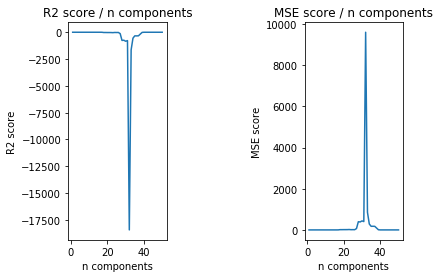

In [61]:
# plot the scores to see the best n_components
plt.subplot(1, 3, 1)
scores_df['R2'].plot(kind='line')
plt.title('R2 score / n components')
plt.ylabel('R2 score')
plt.xlabel('n components')

plt.subplot(1, 3, 3)
scores_df['MSE'].plot(kind='line')
plt.title('MSE score / n components')
plt.ylabel('MSE score')
plt.xlabel('n components')

plt.show()

In [62]:
r2_max = scores_df['R2'].idxmax()
print("Best n:", r2_max, "R2 score:", scores_df['R2'][r2_max])

mse_min = scores_df['MSE'].idxmin()
print("Best n:", mse_min, "MSE:", scores_df['MSE'][mse_min])

Best n: 3 R2 score: 0.20448353298762512
Best n: 3 MSE: 0.4144646789685552


In [63]:
# Use the best n_components parameter
lreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:r2_max], y, test_size=0.2, random_state=0)
model = lreg.fit(X_train, y_train)

# check the result
y_pred = lreg.predict(X_test)
r2 = r2_score(y_test, y_pred) # r2 score
mse = mean_squared_error(y_test, y_pred) # mse
print("R2 score:", r2)
print("MSE:", mse)

R2 score: 0.20448353298762512
MSE: 0.4144646789685552


In [64]:
# Let's try to project the coefs back to the original number of features
eigenvectors = pca.components_
pcr_coefs = eigenvectors[:r2_max, :].T @ lreg.coef_

pcr_coefs.shape

(262,)

In [65]:
# Let's check which venue types effect the most and least
print('Max positive coefs:', pcr_coefs[np.argsort(-pcr_coefs)[:10]])
print('Venue types with most positive effect:', X.columns[np.argsort(-pcr_coefs)[:10]].values)
print('Max negative coefs:', pcr_coefs[np.argsort(pcr_coefs)[:10]])
print('Venue types with most negative effect:', X.columns[np.argsort(pcr_coefs)[:10]].values)
coef_abs = abs(pcr_coefs)
print('Min coefs:', pcr_coefs[np.argsort(coef_abs)[:10]])
print('Venue types with least effect:', X.columns[np.argsort(coef_abs)[:10]].values)

Max positive coefs: [0.01825622 0.01650884 0.01649235 0.01635703 0.01609322 0.01581053
 0.01581053 0.01581053 0.01581053 0.01581053]
Venue types with most positive effect: ['Performing Arts Venue' 'Indian Restaurant' 'Hotel' "Men's Store" 'Lake'
 'Bistro' 'Exhibit' 'Concert Hall' 'Indie Theater' 'Field']
Max negative coefs: [-0.0041051  -0.00373014 -0.00368489 -0.00344844 -0.00344279 -0.00340825
 -0.00332525 -0.00332525 -0.00324038 -0.00318918]
Venue types with most negative effect: ['Discount Store' 'Gas Station' 'Outdoors & Recreation' 'Soccer Field'
 'Wings Joint' 'Baseball Field' 'Construction & Landscaping' 'Tree' 'Pier'
 'Park']
Min coefs: [-7.37972446e-05  1.83326843e-04  1.83326843e-04  1.97812115e-04
 -2.04667062e-04 -2.16613424e-04 -2.35739526e-04  3.42677905e-04
 -4.11949782e-04 -4.20068244e-04]
Venue types with least effect: ['Bank' 'Piercing Parlor' 'Costume Shop' 'Other Repair Shop' 'Supermarket'
 'Tea Room' 'Martial Arts Dojo' 'Mobile Phone Shop' 'Liquor Store'
 'Wine Sh

## IV. Conclusion

PCA did not improve on the performance on the Linear Regression model. 

The coefficient correlations tell us that venues such as Performing Arts venues, Restaurants and stores play a part in increasing a property's value.